In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime, timedelta
from pytz import timezone

In [4]:
df = pd.read_csv("../data/data_initial_complet_processed.csv", encoding='latin-1',sep=';')
#df = pd.read_csv("data_initial_complet_processed_joursSemaine.csv")
for i in df.index:
    df['date_entree_rss'][i] = datetime.strptime(df['date_entree_rss'][i], "%d/%m/%Y")
jours_semaine_liste = []
for date in df['date_entree_rss']:
    jours_semaine_liste.append(pd.Timestamp(date).day_name())
df.insert(2, "jours_semaine", jours_semaine_liste, True)

/tmp/ipykernel_44707/1779670078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_entree_rss'][i] = datetime.strptime(df['date_entree_rss'][i], "%d/%m/%Y")


In [5]:
df

,id,date_entree_rss,jours_semaine,mode_entree_rss,date_sortie_rss,mode_sortie_rss,duree_totale,sexe,age,CMD,GHM,type_ghm,severite,dp_rss,das_rss,actes_rss,liste_actes_classant_rss,acte_classant,date_acte_classant
0,77235,2019-12-26 00:00:00,Thursday,8,02/01/2020,8,7,2,36,14,14C08A,C,A,O342,"['O244', 'Z370', 'Z391']","[['26122019', 'YYYY095', '0', '1', ' ', ' ']...","[['26122019', 'JQGA002', '0', '1', ' ', '-12']]",JQGA002,26/12/2019
1,79525,2020-01-20 00:00:00,Monday,8,20/01/2020,8,0,1,63,28,28Z17Z,Z,Z,Z512,[],[],[],NaN,NaN
2,79526,2020-01-20 00:00:00,Monday,8,20/01/2020,8,0,2,21,28,28Z17Z,Z,Z,Z512,[],[],[],NaN,NaN
3,77195,2019-11-18 00:00:00,Monday,8,25/01/2020,9,68,2,82,13,13C034,C,4,N938,"['E43', 'T8138', 'Z515', 'R34', 'R031', 'K921'...","[['18112019', 'JKFA032', '0', '4', ' ', ' ']...","[['18112019', 'JKFA032', '0', '1', ' ', ' ']...",JKFA032,18/11/2019
4,79527,2020-01-20 00:00:00,Monday,8,20/01/2020,8,0,1,23,28,28Z17Z,Z,Z,Z512,[],[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70740,150253,2019-11-01 00:00:00,Friday,8,01/11/2019,8,0,2,28,14,14Z16T,Z,T,O600,['Z358'],[],[],NaN,NaN
70741,150254,2019-10-07 00:00:00,Monday,N,10/10/2019,8,3,1,1,15,15M05A,M,A,Z380,[],[],[],NaN,NaN
70742,150255,2019-10-07 00:00:00,Monday,N,10/10/2019,8,3,2,1,15,15M05A,M,A,Z380,[],[],[],NaN,NaN
70743,150256,2019-12-16 00:00:00,Monday,N,20/12/2019,8,4,2,1,15,15M05A,M,A,Z380,['P925'],[],[],NaN,NaN


In [6]:
#On garde uniquement les lignes qui nous intéressent
df1 = df[~(df['duree_totale']=='0')]
df2 = df1[~(df1['duree_totale']==0)]
df3 = df2[df1['type_ghm'].isin(['C','K'])]
df4 = df3[~(df3['CMD'].isin(['28','14','15']))]
df5 = df4[~(df4['mode_entree_rss']=='85')]

categorie_majeure = []
for i in df5.index:
    categorie_majeure.append(df5['GHM'][i][:2])
df5.insert(11, "categorie_majeure", categorie_majeure, True)   

def remove_rows(df, column, n):
    value_counts = df[column].value_counts()
    to_drop = value_counts[value_counts < n].index
    return df[~df[column].isin(to_drop)]

df5 = remove_rows(df5, 'acte_classant', 30)

/tmp/ipykernel_44707/231153890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df1['type_ghm'].isin(['C','K'])]


Nombre max d'actes par jours: 35


<AxesSubplot: >

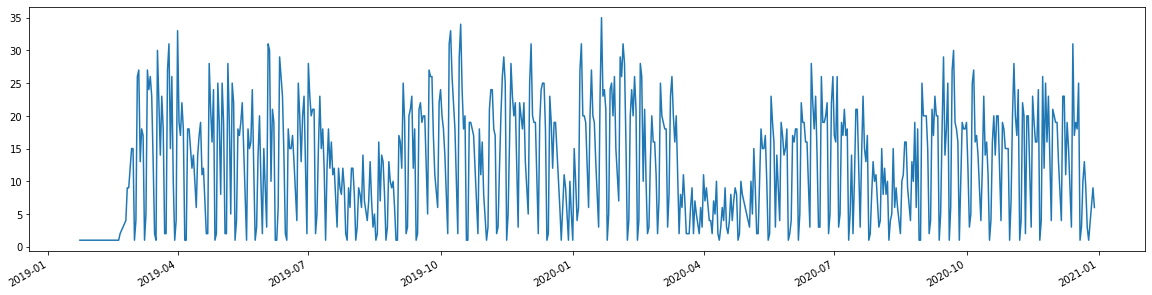

In [7]:
print("Nombre max d'actes par jours:", max(df5['date_entree_rss'].value_counts()))

plt.figure(figsize=(20, 5))
df5['date_entree_rss'].value_counts().plot()

<AxesSubplot: >

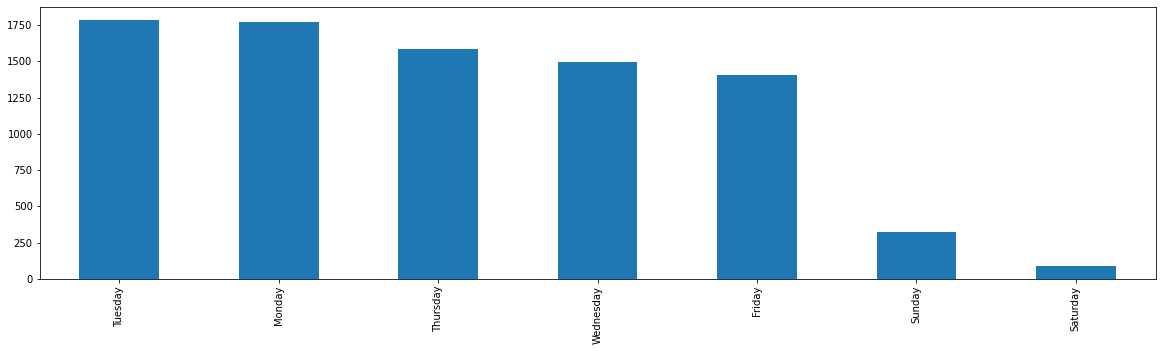

In [8]:
plt.figure(figsize=(20, 5))
df5['jours_semaine'].value_counts().plot(kind = 'bar')

In [9]:
data_jours = df5.sort_values(by='date_entree_rss')['date_entree_rss'].value_counts()
data_sansWeekend = df5[~(df5['jours_semaine']=='Sunday')]
data_sansWeekend = df5[~(df5['jours_semaine']=='Saturday')]
data_jours_sansWeekend = data_sansWeekend.sort_values(by='date_entree_rss')['date_entree_rss'].value_counts()

<AxesSubplot: >

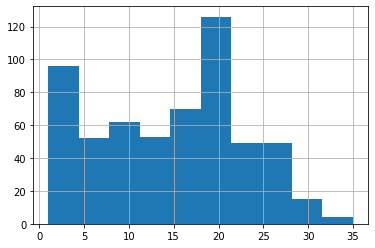

In [10]:
data_jours_sansWeekend.hist()

In [11]:
df_jours = pd.DataFrame(data_jours)
df_jours = df_jours.sort_index(axis = 0)

<Figure size 1440x720 with 0 Axes>

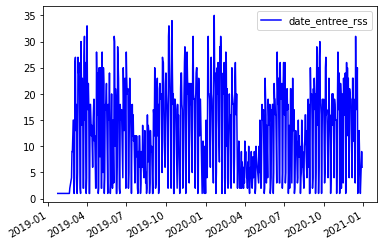

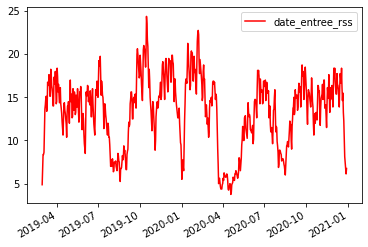

In [12]:
plt.figure(figsize=(20, 10))
df_jours.plot(color = 'b')
df_jours.rolling(8).mean().plot(color = 'r')
plt.show()

In [13]:
groupes_cmd = {'01': ['Système Nerveux',0],
               '02': ['Oeil',0],
               '03': ['Oreilles, du nez, de la gorge, de la bouche et des dents',0],
               '04': ['Appareil respiratoire',0],
               '05': ['Appareil circulatoire',0],
               '06': ['Tube digestif',0],
               '07': ['Système hépatobiliaire et du pancréas',0],
               '08': ['Appareil musculosquelettique et du tissu conjonctif',0],
               '09': ['Peau, des tissus sous-cutanés et des seins',0],
               '10': ['Endocriniennes, métaboliques et nutritionnelles',0],
               '11': ['Rein et des voies urinaires',0],
               '12': ['Appareil génital masculin',0],
               '13': ['Appareil génital féminin',0],
               '14': ['Grossesses pathologiques, accouchements et affections du post-partum',0],
               '15': ['Nouveau-nés, prématurés et affections de la période périnatale',0],
               '16': ['Sang et des organes hématopoïétiques',0],
               '17': ['Myéloprolifératives et tumeurs de siège imprécis ou diffus',0],
               '18': ['Maladies infectieuses et parasitaires',0],
               '19': ['Maladies et troubles mentaux',0],
               '20': ['Troubles mentaux organiques liés à labsorption de drogues ou induits par celles-ci',0],
               '21': ['Traumatismes, allergies et empoisonnements',0],
               '22': ['Brûlures',0],
               '23': ['Facteurs influant sur létat de santé et autres motifs de recours aux services de santé',0],
               '24': ['Séjours de moins de 2 jours',0],
               '25': ['Maladies dues à une infection par le VIH',0],
               '26': ['Traumatismes multiples graves',0],
               '27': ['Transplantations dorganes',0],
               '28': ['Séances',0],
               '90': ['Erreurs et autres séjours inclassables',0]}

In [14]:
for i in groupes_cmd:
    chirurgies_par_bloc = df5[df5['categorie_majeure']==i]['date_entree_rss'].value_counts()
    if not chirurgies_par_bloc.empty:
        groupes_cmd[i][1] = max(chirurgies_par_bloc)

In [15]:
groupes_cmd

{'01': ['Système Nerveux', 0],
 '02': ['Oeil', 9],
 '03': ['Oreilles, du nez, de la gorge, de la bouche et des dents', 6],
 '04': ['Appareil respiratoire', 0],
 '05': ['Appareil circulatoire', 4],
 '06': ['Tube digestif', 9],
 '07': ['Système hépatobiliaire et du pancréas', 3],
 '08': ['Appareil musculosquelettique et du tissu conjonctif', 6],
 '09': ['Peau, des tissus sous-cutanés et des seins', 6],
 '10': ['Endocriniennes, métaboliques et nutritionnelles', 9],
 '11': ['Rein et des voies urinaires', 9],
 '12': ['Appareil génital masculin', 6],
 '13': ['Appareil génital féminin', 6],
 '14': ['Grossesses pathologiques, accouchements et affections du post-partum',
  6],
 '15': ['Nouveau-nés, prématurés et affections de la période périnatale', 0],
 '16': ['Sang et des organes hématopoïétiques', 0],
 '17': ['Myéloprolifératives et tumeurs de siège imprécis ou diffus', 2],
 '18': ['Maladies infectieuses et parasitaires', 1],
 '19': ['Maladies et troubles mentaux', 0],
 '20': ['Troubles ment

In [16]:
type(df5['date_entree_rss'][0])

datetime.datetime

In [17]:
dates = {}
date = datetime.strptime('23/01/2019', "%d/%m/%Y")
for i in range ((datetime.strptime('30/12/2020', "%d/%m/%Y") - datetime.strptime('23/01/2019', "%d/%m/%Y")).days+1):
    dates[date] = 0
    date = date+ timedelta(days = 1)

In [18]:
for i in df5.index:
    for j in range (df5['duree_totale'][i]):
        dates[df5['date_entree_rss'][i] + timedelta(days = j)] += 1

In [19]:
df_lits_dates = pd.DataFrame.from_dict(dates, orient='index')
max(df_lits_dates[0])

72

In [20]:
dates = {}
date = datetime.strptime('23/01/2019', "%d/%m/%Y")
for i in range ((datetime.strptime('30/12/2020', "%d/%m/%Y") - datetime.strptime('23/01/2019', "%d/%m/%Y")).days+1):
    dates[date] = 0
    date = date+ timedelta(days = 1)
for i in df5.index:
    for j in range (df5['duree_totale'][i]):
        dates[df5['date_entree_rss'][i] + timedelta(days = j)] += 1
df_lits_dates = pd.DataFrame.from_dict(dates, orient='index')

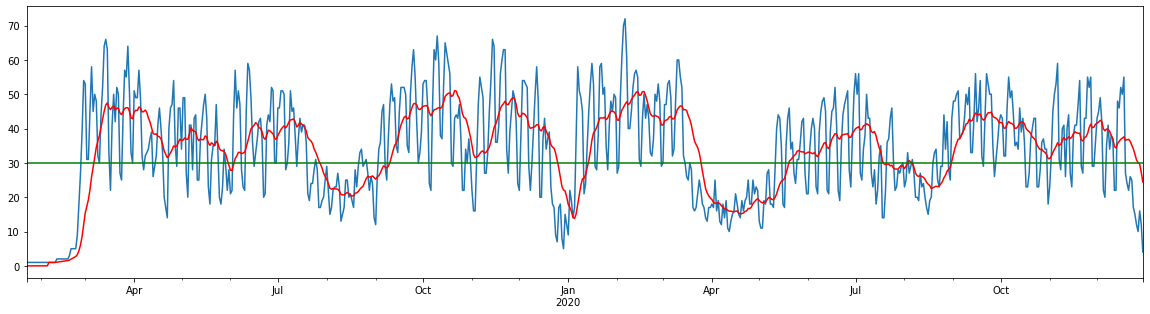

In [21]:
plt.figure(figsize=(20, 5))
df_lits_dates[0].plot()
moyenne1 = df_lits_dates[0].rolling(15).mean().fillna(0)
moyenne1.plot(color = 'r')
plt.axhline(y = 30, color = 'g')
plt.show()

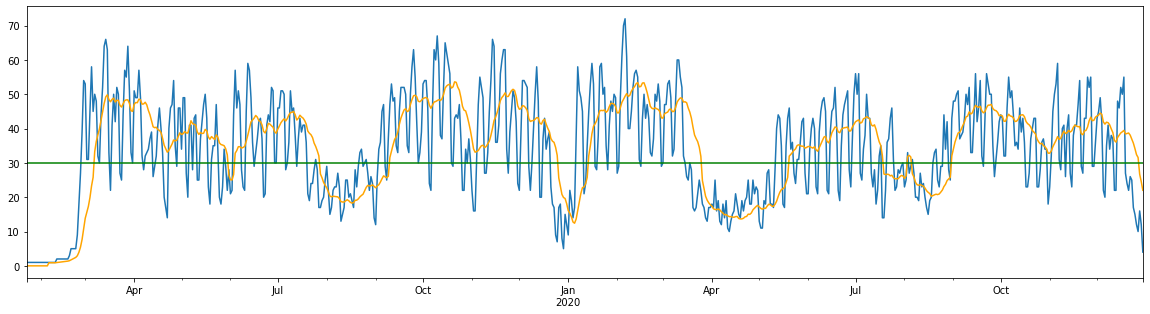

In [22]:
moyenne2 = moyenne1.copy()
for i in range (len(moyenne2)):
    if moyenne2[i] <= 30:
        moyenne2[i] *= 0.9
    else :
        moyenne2[i] *= 1.05

plt.figure(figsize=(20, 5))
df_lits_dates[0].plot()
moyenne2.plot(color = 'orange')
plt.axhline(y = 30, color = 'g')
plt.show()

In [23]:
dates_lits_projection = dates.copy()
counter = 12
for i in dates_lits_projection:
    if counter < len(moyenne2):
        dates_lits_projection[i] = int(moyenne2[counter])
        counter += 1

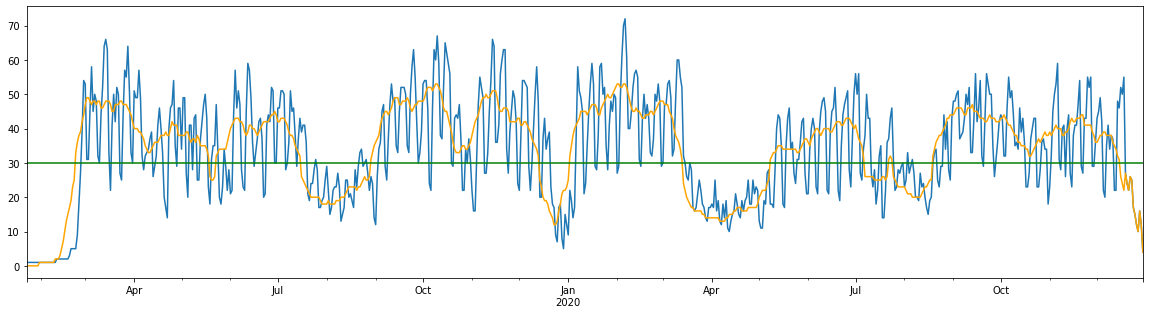

In [24]:
df_lits_dates_projection = pd.DataFrame.from_dict(dates_lits_projection, orient='index')
plt.figure(figsize=(20, 5))
df_lits_dates[0].plot()
df_lits_dates_projection[0].plot(color = 'orange')
plt.axhline(y = 30, color = 'g')
plt.show()

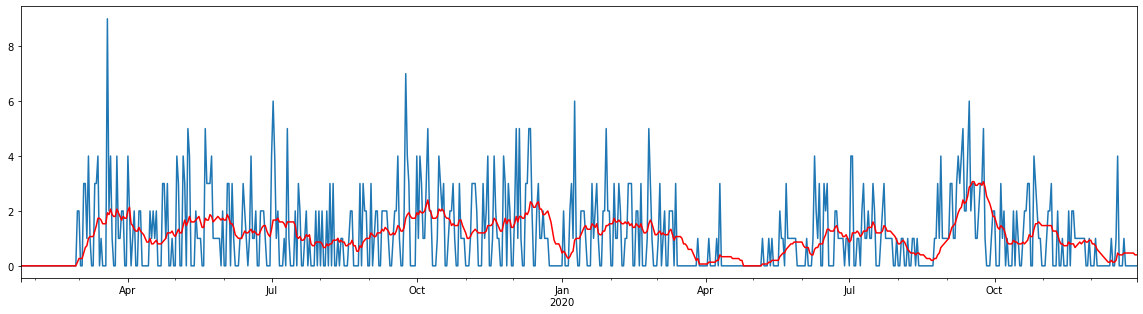

In [28]:
#export json n_lits par jour par maladie

df_01 = df5[df5['categorie_majeure']=='02']

dates_01 = {}
date = datetime.strptime('23/01/2019', "%d/%m/%Y")
for i in range ((datetime.strptime('30/12/2020', "%d/%m/%Y") - datetime.strptime('23/01/2019', "%d/%m/%Y")).days+1):
    dates_01[date] = 0
    date = date+ timedelta(days = 1)

for i in df_01.index:
    for j in range (df_01['duree_totale'][i]):
        dates_01[df_01['date_entree_rss'][i] + timedelta(days = j)] += 1

df_lits_dates_01 = pd.DataFrame.from_dict(dates_01, orient='index')

plt.figure(figsize=(20, 5))
df_lits_dates_01[0].plot()
moyenne_01 = df_lits_dates_01[0].rolling(15).mean().fillna(0)
moyenne_01.plot(color = 'r')
#plt.axhline(y = 50, color = 'g')
plt.show()

dates_lits_projection_01 = dates_01.copy()
counter = 12
for i in dates_lits_projection_01:
    if counter < len(moyenne_01):
        dates_lits_projection_01[i] = int(moyenne_01[counter])
        counter += 1
df_lits_dates_projection_01 = pd.DataFrame.from_dict(dates_lits_projection_01, orient='index')
dates_lits_projection_exp_01 = {}
for i in dates_lits_projection_01:
    dates_lits_projection_exp_01[i.strftime("%Y-%m-%d")] = dates_lits_projection_01[i]

df_lits_dates_projection_exp_01 = pd.DataFrame.from_dict(dates_lits_projection_exp_01, orient='index')

df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.reset_index()
df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={0: 'nb_lits'})
df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={'index': 'date'})
df_lits_dates_projection_exp_01

df_lits_dates_projection_exp_01.to_json('cmd_01.json', orient='records')

In [29]:
# Export fichier json pour les chirurgies par jour par maladie/bloc opératoire

df_01 = df5[df5['categorie_majeure']=='02']

dataCount = df_01['date_entree_rss'].value_counts()



In [30]:
moyenne3 = moyenne2.copy()
df_lits_dates[datetime.strptime('23/01/2019', "%d/%m/%Y"):datetime.strptime('25/01/2019', "%d/%m/%Y")] = 3
df_lits_dates

,0
2019-01-23,3
2019-01-24,3
2019-01-25,3
2019-01-26,1
2019-01-27,1
...,...
2020-12-26,12
2020-12-27,10
2020-12-28,16
2020-12-29,12


In [31]:
dates_lits_projection_exp = {}
for i in dates_lits_projection:
    dates_lits_projection_exp[i.strftime("%Y-%m-%d")] = dates_lits_projection[i]

df_lits_dates_projection_exp = pd.DataFrame.from_dict(dates_lits_projection_exp, orient='index')
df_lits_dates_projection_exp

,0
2019-01-23,0
2019-01-24,0
2019-01-25,0
2019-01-26,0
2019-01-27,0
...,...
2020-12-26,12
2020-12-27,10
2020-12-28,16
2020-12-29,12


In [32]:
#df_lits_dates_projection['date'] = df_lits_dates_projection.index
df_lits_dates_projection_exp = df_lits_dates_projection_exp.reset_index()
df_lits_dates_projection_exp = df_lits_dates_projection_exp.rename(columns={0: 'nb_lits'})
df_lits_dates_projection_exp = df_lits_dates_projection_exp.rename(columns={'index': 'date'})
df_lits_dates_projection_exp

,date,nb_lits
0,2019-01-23,0
1,2019-01-24,0
2,2019-01-25,0
3,2019-01-26,0
4,2019-01-27,0
...,...,...
703,2020-12-26,12
704,2020-12-27,10
705,2020-12-28,16
706,2020-12-29,12


In [33]:
from statistics import mean

df_lits_dates_carre = df_lits_dates_projection_exp.copy()
enregistrement = []
frontiere = 31
cruise = 0
barriere = 0
for i in df_lits_dates_carre.index:
    enregistrement.append(df_lits_dates_carre['nb_lits'][i])
    if df_lits_dates_carre['nb_lits'][i] >= frontiere and cruise == 0:
        cruise = 1
        df_lits_dates_carre['nb_lits'][barriere:i] = round(mean(enregistrement))
        enregistrement = []
        barriere = i
    elif df_lits_dates_carre['nb_lits'][i] <= frontiere and cruise == 1:
        cruise = 0
        df_lits_dates_carre['nb_lits'][barriere:i] = round(mean(enregistrement)*1.10)
        enregistrement = []
        barriere = i
df_lits_dates_carre['nb_lits'][barriere:] = mean(enregistrement)

df_lits_dates_carre        

/tmp/ipykernel_44707/2664500961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lits_dates_carre['nb_lits'][barriere:i] = round(mean(enregistrement))
/tmp/ipykernel_44707/2664500961.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lits_dates_carre['nb_lits'][barriere:i] = round(mean(enregistrement)*1.10)
/tmp/ipykernel_44707/2664500961.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lits_dates_carre['nb_lits'][ba

,date,nb_lits
0,2019-01-23,5
1,2019-01-24,5
2,2019-01-25,5
3,2019-01-26,5
4,2019-01-27,5
...,...,...
703,2020-12-26,18
704,2020-12-27,18
705,2020-12-28,18
706,2020-12-29,18


/tmp/ipykernel_44707/1646632649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['date'][i] = datetime.strptime(df_plot['date'][i], "%Y-%m-%d")
/tmp/ipykernel_44707/1646632649.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['nb_lits'][jours] *= 0.8


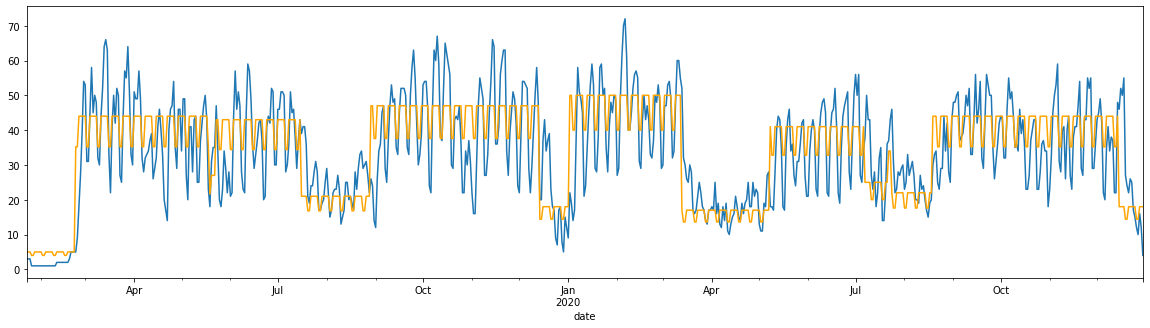

In [34]:
df_plot = df_lits_dates_carre.copy()
for i in df_plot.index:
    df_plot['date'][i] = datetime.strptime(df_plot['date'][i], "%Y-%m-%d")
    #print(type(df_plot['date'][i]))
jours_semaine_liste = []
for date in df_plot['date']:
    jours_semaine_liste.append(pd.Timestamp(date).day_name()) 
df_plot.insert(2, "jours_semaine", jours_semaine_liste, True)
for jours in df_plot.index:
    if df_plot['jours_semaine'][jours] == 'Saturday' or df_plot['jours_semaine'][jours] == 'Sunday':
        df_plot['nb_lits'][jours] *= 0.8
df_plot = df_plot.set_index('date')
df_plot.insert(1, "lits_reel", df_lits_dates[0], True)

plt.figure(figsize=(20, 5))
df_plot['lits_reel'].plot()
df_plot['nb_lits'].plot(color = 'orange')
#plt.axhline(y = 30, color = 'g')
plt.show()

In [35]:
jours_semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for jour in jours_semaine:
    print('Nombre max de lits à '+jour+' : ', max(df_plot[df_plot['jours_semaine']==jour]['lits_reel']))

Nombre max de lits à Monday :  52
Nombre max de lits à Tuesday :  65
Nombre max de lits à Wednesday :  70
Nombre max de lits à Thursday :  72
Nombre max de lits à Friday :  64
Nombre max de lits à Saturday :  40
Nombre max de lits à Sunday :  40


In [36]:
df_export = df_plot.copy()
df_export = df_export.reset_index()
df_export = df_export.rename(columns={'nb_lits': 'c_lits'})
df_export = df_export.rename(columns={'index': 'date'})
df_export.pop('lits_reel')
df_export.pop('jours_semaine')

calendrier = []
date = datetime.strptime('23/01/2019', "%d/%m/%Y")
for i in df_export.index:
    date_str = date.strftime("%Y-%m-%d")
    calendrier.append(date_str)
    date = date + timedelta(days = 1)
df_export.pop('date')
df_export.insert(0, "date", calendrier, True) 

df_export.to_json('carre_lits_parJours_baisseWeekend.json', orient='records')

In [37]:
df_lits_dates_carre.to_json('capacite_carre.json', orient='records')

In [38]:
liste_json = [{'date': list(df_lits_dates_projection_exp['date']), 'capacite_lits': list(df_lits_dates_projection_exp['nb_lits']) }]

In [39]:
lista = []
for i in df_plot['nb_lits']:
    lista.append(i)
lista = pd.DataFrame(lista)

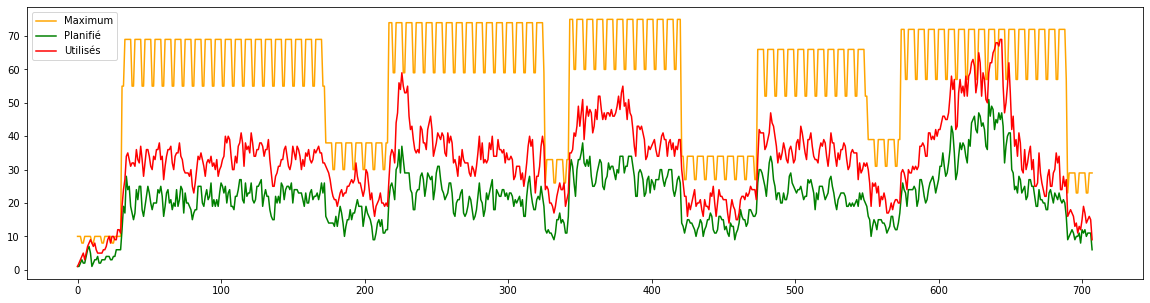

In [40]:
import requests
import json

r = requests.get('https://inputhc.onxzy.dev/api/night/find', params={
    'date_start': '2019-01-23', 
    'date_end': '2020-12-30', 
    'simple_array': 1
})

reponse = r.json()
#print(reponse)

r1 = requests.get('https://inputhc.onxzy.dev/api/night/usage/plan', params={
    'date_start': '2019-01-23', 
    'date_end': '2020-12-30' 
})

reponse1 = r1.json()
#print(reponse)

r2 = requests.get('https://inputhc.onxzy.dev/api/night/usage/real', params={
    'date_start': '2019-01-23', 
    'date_end': '2020-12-30' 
})

reponse2 = r2.json()

df_final = pd.DataFrame.transpose(pd.DataFrame([reponse, reponse1, reponse2]))

plt.figure(figsize=(20, 5))
df_final[0].plot(color = 'orange', label = 'Maximum')
df_final[1].plot(color = 'green', label = 'Planifié')
df_final[2].plot(color = 'red', label = 'Utilisés')
plt.legend()
plt.show()

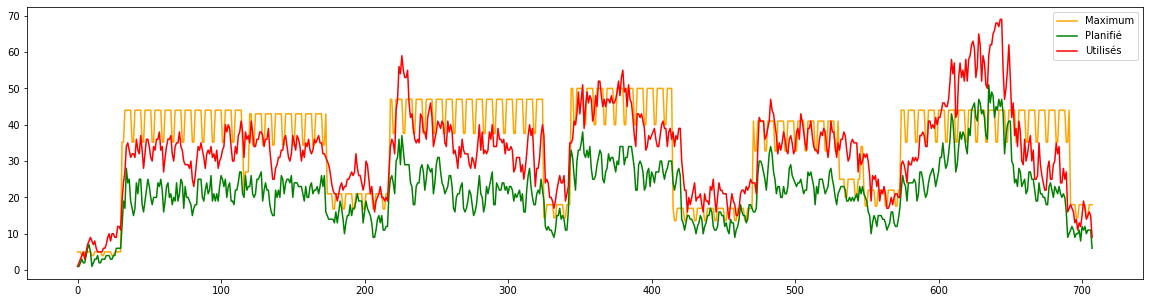

In [41]:
plt.figure(figsize=(20, 5))
lista[0].plot(color = 'orange', label = 'Maximum')
df_final[1].plot(color = 'green', label = 'Planifié')
df_final[2].plot(color = 'red', label = 'Utilisés')
plt.legend()
plt.show()

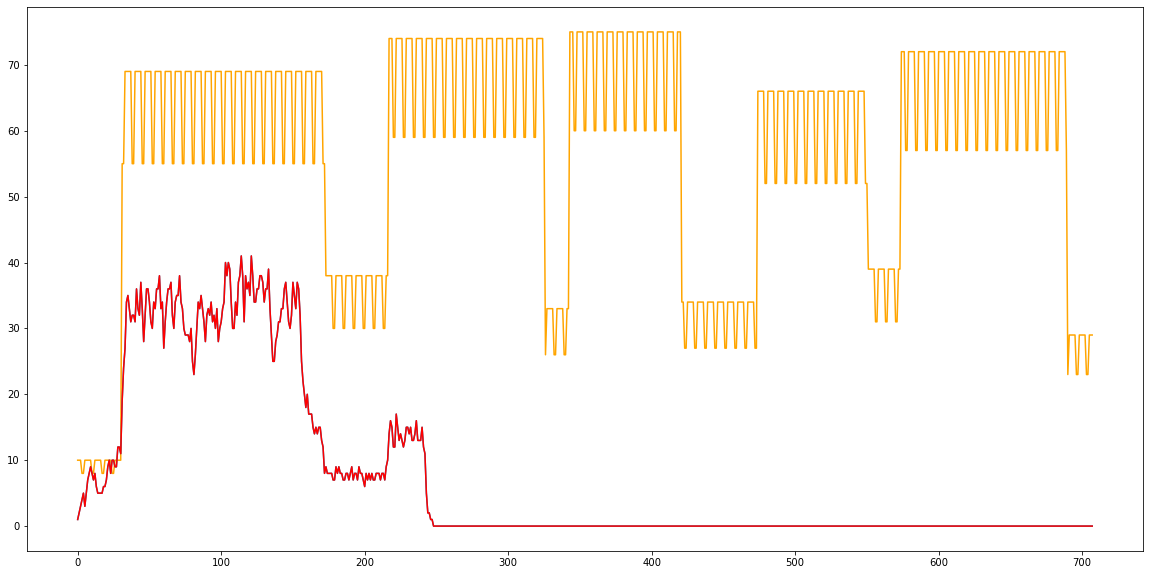

In [173]:
plt.figure(figsize=(20, 10))
#df_final[0][:50].plot(color = 'orange')
#df_final[1][:50].plot()
#df_final[2][:50].plot(color = 'red')
df_final[0].plot(color = 'orange')
df_final[1].plot()
df_final[2].plot(color = 'red')
#plt.axhline(y = 50, color = 'g')
plt.show()

In [141]:
df_final[0]

0      10
1      10
2      10
3       8
4       8
       ..
703    23
704    23
705    29
706    29
707    29
Name: 0, Length: 708, dtype: int64

## Export chirurgies realisés

In [117]:
df_export_chirurgies = df5.sort_values(by='date_entree_rss')[['age', 'sexe', 'acte_classant', 'categorie_majeure', 'duree_totale']].copy()

def remove_rows(df, column, n):
    value_counts = df[column].value_counts()
    to_drop = value_counts[value_counts < n].index
    return df[~df[column].isin(to_drop)]

df_test_red = remove_rows(df_export_chirurgies, 'acte_classant', 30)

calendrier = []
date = datetime.strptime('23/01/2019', "%d/%m/%Y")
for i in df_export.index:
    for i in range (13):
        date_str = date.strftime("%Y-%m-%d")
        calendrier.append(date_str)
    date = date + timedelta(days = 1)
calendrier = calendrier[:8455]
df_test_red.insert(4, "date", calendrier, True) 

#df_export_chirurgies = df_export_chirurgies[df_export_chirurgies['acte_classant']]
#df_export_chirurgies = df_export_chirurgies.dropna()

In [119]:
df_test_red.to_json('donnees_reels3.json', orient='records')

In [48]:
actes = []
compte = df_export_chirurgies['acte_classant'].value_counts().copy()
for i in compte.index:
    if compte[i]>= 30:
        actes.append(i)

In [118]:
df_test_red

,age,sexe,acte_classant,categorie_majeure,date,duree_totale
37723,88,2,HMFC004,07,2019-01-23,40
37734,66,2,EEAF006,05,2019-01-23,23
37749,81,2,NFKA007,08,2019-01-23,10
37754,89,1,HHFA008,06,2019-01-23,16
37755,68,1,JGFC001,12,2019-01-23,11
...,...,...,...,...,...,...
37561,54,2,QBFA005,10,2020-11-03,2
37562,85,1,HEAE003,06,2020-11-03,1
37580,34,2,HFCC003,10,2020-11-03,1
37584,35,2,HFCC003,10,2020-11-03,1


In [31]:
df5.loc[df['acte_classant'] == some_value]

,id,date_entree_rss,jours_semaine,mode_entree_rss,date_sortie_rss,mode_sortie_rss,duree_totale,sexe,age,CMD,GHM,categorie_majeure,type_ghm,severite,dp_rss,das_rss,actes_rss,liste_actes_classant_rss,acte_classant,date_acte_classant
0,77235,2019-12-26 00:00:00,Thursday,8,02/01/2020,8,7,2,36,14,14C08A,14,C,A,O342,"['O244', 'Z370', 'Z391']","[['26122019', 'YYYY095', '0', '1', ' ', ' ']...","[['26122019', 'JQGA002', '0', '1', ' ', '-12']]",JQGA002,26/12/2019
3,77195,2019-11-18 00:00:00,Monday,8,25/01/2020,9,68,2,82,13,13C034,13,C,4,N938,"['E43', 'T8138', 'Z515', 'R34', 'R031', 'K921'...","[['18112019', 'JKFA032', '0', '4', ' ', ' ']...","[['18112019', 'JKFA032', '0', '1', ' ', ' ']...",JKFA032,18/11/2019
7,77280,2019-12-29 00:00:00,Sunday,8,04/01/2020,8,6,2,80,6,06C242,06,C,2,K432,"['R34', 'R031']","[['30122019', 'LMMA004', '0', '4', ' ', ' ']...","[['30122019', 'LMMA004', '0', '1', ' ', ' ']]",LMMA004,30/12/2019
35,77282,2019-12-30 00:00:00,Monday,8,03/01/2020,8,4,2,35,6,06C071,06,C,1,K623,[],"[['30122019', 'HJDC001', '0', '4', ' ', ' ']...","[['30122019', 'HJDC001', '0', '1', ' ', ' ']]",HJDC001,30/12/2019
44,77400,2020-01-02 00:00:00,Thursday,8,04/01/2020,8,2,1,59,12,12C041,12,C,1,N40,[],"[['02012020', 'JGFE023', '0', '4', ' ', '-02']...","[['02012020', 'JGFE023', '0', '1', ' ', '-02']]",JGFE023,02/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70676,150060,2019-12-30 00:00:00,Monday,8,31/12/2019,8,1,1,72,6,06K02Z,06,K,Z,D010,"['D123', 'I10', 'E1198', 'E780', 'G473', 'Z998...","[['30122019', 'HHFE006', '0', '4', ' ', ' ']...","[['30122019', 'HHFE006', '0', '1', ' ', ' ']...",HHFE006,30/12/2019
70677,150061,2019-12-30 00:00:00,Monday,8,31/12/2019,8,1,2,46,10,10C131,10,C,1,E6605,"['E1198', 'G473']","[['30122019', 'HFCC003', '0', '4', ' ', '-31']...","[['30122019', 'HFCC003', '0', '1', ' ', '-31']]",HFCC003,30/12/2019
70696,150081,2019-12-30 00:00:00,Monday,8,31/12/2019,8,1,2,72,6,06K02Z,06,K,Z,K635+8,['K573'],"[['30122019', 'HHFE002', '0', '4', ' ', ' ']...","[['30122019', 'HHFE002', '0', '1', ' ', ' ']...",HHFE002,30/12/2019
70701,150086,2019-12-30 00:00:00,Monday,8,31/12/2019,8,1,2,34,10,10C101,10,C,1,L987,[],"[['30122019', 'QBFA008', '0', '4', ' ', ' ']]","[['30122019', 'QBFA008', '0', '1', ' ', ' ']]",QBFA008,30/12/2019
